In [11]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Task 1:

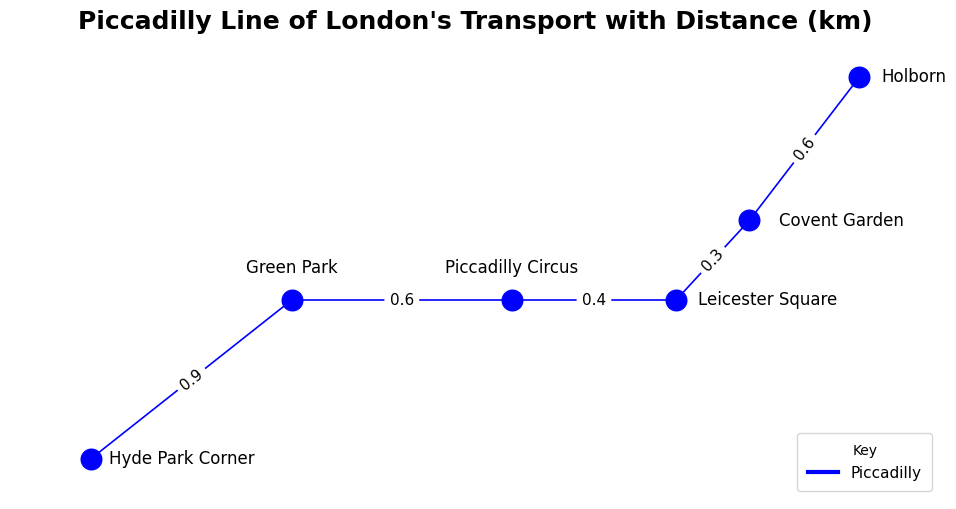

In [68]:
# Define stations and distances between them (in km)
stations = [
    "Hyde Park Corner", "Green Park", "Piccadilly Circus",
    "Leicester Square", "Covent Garden", "Holborn"
]

# Distances between each pair of stations (in km)
distances = {
    ("Hyde Park Corner", "Green Park"): 0.9,
    ("Green Park", "Piccadilly Circus"): 0.6,
    ("Piccadilly Circus", "Leicester Square"): 0.4,
    ("Leicester Square", "Covent Garden"): 0.3,
    ("Covent Garden", "Holborn"): 0.6,
}

# Initialize the graph
G = nx.Graph()

# Add edges to the graph with distances as weights
for (station1, station2), distance in distances.items():
    G.add_edge(station1, station2, weight=distance)

# Define manual layout positions to match the original diagram
pos = {
    "Hyde Park Corner": (0, 0),
    "Green Park": (1.1, 1),
    "Piccadilly Circus": (2.3, 1),
    "Leicester Square": (3.2, 1),
    "Covent Garden": (3.6, 1.5),
    "Holborn": (4.2, 2.4)
}

# Setup the graph
plt.figure(figsize=(12, 6))
plt.title("Piccadilly Line of London's Transport with Distance (km)", fontsize=18, fontweight="bold")

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=220, node_color="blue")
nx.draw_networkx_edges(G, pos, width=1.2, edge_color="blue")

# Labels for stations
plt.text(0.5, 0, "Hyde Park Corner", fontsize=12, fontfamily="sans-serif", ha="center", va="center")
plt.text(1.1, 1.2, "Green Park", fontsize=12, fontfamily="sans-serif", ha="center", va="center")
plt.text(2.3, 1.2, "Piccadilly Circus", fontsize=12, fontfamily="sans-serif", ha="center", va="center")
plt.text(3.7, 1, "Leicester Square", fontsize=12, fontfamily="sans-serif", ha="center", va="center")
plt.text(4.1, 1.5, "Covent Garden", fontsize=12, fontfamily="sans-serif", ha="center", va="center")
plt.text(4.5, 2.4, "Holborn", fontsize=12, fontfamily="sans-serif", ha="center", va="center")

# Add labels for distances on the edges
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=11)

# Create a legend for the Piccadilly line 
plt.plot([], [], color="blue", linewidth=3, label="Piccadilly")

# Display the legend
plt.legend(title="Key", loc="lower right", fontsize=11, borderpad=0.7)

# Show the graph
plt.axis("off")
plt.show()

# Task 2:

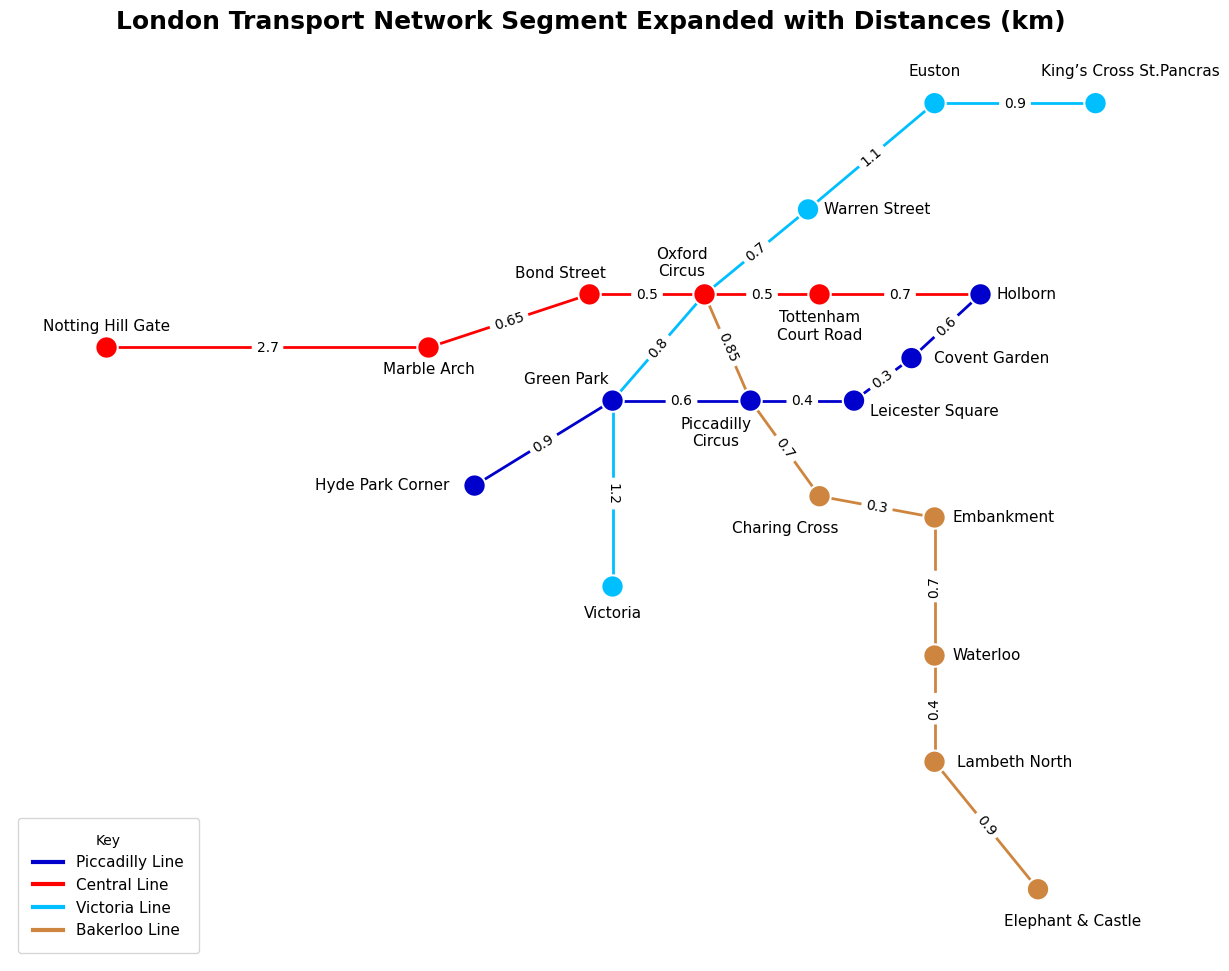

In [63]:
# Initialize graph
G = nx.Graph()

# Define distances between stations (in km)
distances = {
    ("Hyde Park Corner", "Green Park"): 0.9,
    ("Green Park", "Piccadilly Circus"): 0.6,
    ("Piccadilly Circus", "Leicester Square"): 0.4,
    ("Leicester Square", "Covent Garden"): 0.3,
    ("Covent Garden", "Holborn"): 0.6,
    ("Notting Hill Gate", "Marble Arch"): 2.7,
    ("Marble Arch", "Bond Street"): 0.65,
    ("Bond Street", "Oxford Circus"): 0.5,
    ("Oxford Circus", "Tottenham Court Road"): 0.5,
    ("Tottenham Court Road", "Holborn"): 0.7,
    ("Victoria", "Green Park"): 1.2,
    ("Green Park", "Oxford Circus"): 0.8,
    ("Oxford Circus", "Warren Street"): 0.7,
    ("Warren Street", "Euston"): 1.1,
    ("Euston", "King’s Cross St. Pancras"): 0.9,
    ("Elephant & Castle", "Lambeth North"): 0.9,
    ("Lambeth North", "Waterloo"): 0.4,
    ("Waterloo", "Embankment"): 0.7,
    ("Embankment", "Charing Cross"): 0.3,
    ("Charing Cross", "Piccadilly Circus"): 0.7,
    ("Piccadilly Circus", "Oxford Circus"): 0.85
}

# Add edges with distances as weights
for (station1, station2), distance in distances.items():
    G.add_edge(station1, station2, weight=distance)

# Define layout positions for stations
pos = {
    "Hyde Park Corner": (0, 0.2),
    "Green Park": (1.2, 1),
    "Piccadilly Circus": (2.4, 1),
    "Leicester Square": (3.3, 1),
    "Covent Garden": (3.8, 1.4),
    "Holborn": (4.4, 2),
    "Notting Hill Gate": (-3.2, 1.5),
    "Marble Arch": (-0.4, 1.5),
    "Bond Street": (1, 2),
    "Oxford Circus": (2, 2),
    "Tottenham Court Road": (3, 2),
    "Victoria": (1.2, -0.75),
    "Warren Street": (2.9, 2.8),
    "Euston": (4, 3.8),
    "King’s Cross St. Pancras": (5.4, 3.8),
    "Elephant & Castle": (4.9, -3.6),
    "Lambeth North": (4, -2.4),
    "Waterloo": (4, -1.4),
    "Embankment": (4, -0.1),
    "Charing Cross": (3, 0.1)
}

# Define line colors and edges
line_colors = {
    "Piccadilly Line": ("mediumblue", [
        ("Hyde Park Corner", "Green Park"), ("Green Park", "Piccadilly Circus"),
        ("Piccadilly Circus", "Leicester Square"), ("Leicester Square", "Covent Garden"),
        ("Covent Garden", "Holborn")
    ]),
    "Central Line": ("red", [
        ("Notting Hill Gate", "Marble Arch"), ("Marble Arch", "Bond Street"),
        ("Bond Street", "Oxford Circus"), ("Oxford Circus", "Tottenham Court Road"),
        ("Tottenham Court Road", "Holborn")
    ]),
    "Victoria Line": ("deepskyblue", [
        ("Victoria", "Green Park"), ("Green Park", "Oxford Circus"),
        ("Oxford Circus", "Warren Street"), ("Warren Street", "Euston"),
        ("Euston", "King’s Cross St. Pancras")
    ]),
    "Bakerloo Line": ("peru", [
        ("Elephant & Castle", "Lambeth North"), ("Lambeth North", "Waterloo"),
        ("Waterloo", "Embankment"), ("Embankment", "Charing Cross"),
        ("Charing Cross", "Piccadilly Circus"), ("Piccadilly Circus", "Oxford Circus")
    ])
}

# Automatically determine node colors
node_colors = {}
for line, (color, edges) in line_colors.items():
    for edge in edges: 
        for node in edge:  
            if node not in node_colors:  
                node_colors[node] = color  
                

# Plot graph
plt.figure(figsize=(15, 12))
plt.title("London Transport Network Segment Expanded with Distances (km)", fontsize=18, fontweight="bold")

# Prepare the list of colors for the nodes using a loop
node_color_list = []
for node in G.nodes:
    node_color_list.append(node_colors[node])

# Draw nodes with colors based on the first occurrence in a line
nx.draw_networkx_nodes(G, pos, node_size=260, node_color=node_color_list, edgecolors="white", linewidths=1.5)

# Draw edges for each line
for line, (color, edges) in line_colors.items():
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=color, width=2)

# Define layout positions for stations
label_pos = {
    "Hyde Park Corner": (-0.8, 0.2),
    "Green Park": (0.8, 1.2),
    "Piccadilly\nCircus": (2.1, 0.7),
    "Leicester Square": (4, 0.9),
    "Covent Garden": (4.5, 1.4),
    "Holborn": (4.8, 2),
    
    "Notting Hill Gate": (-3.2, 1.7),
    "Marble Arch": (-0.4, 1.3),
    "Bond Street": (0.75, 2.2),
    "Oxford\nCircus": (1.8, 2.3),
    "Tottenham\nCourt Road": (3, 1.7),
    
    "Victoria": (1.2, -1),
    "Warren Street": (3.5, 2.8),
    "Euston": (4, 4.1),
    "King’s Cross St.Pancras": (5.7, 4.1),  
    
    "Elephant & Castle": (5.2, -3.9),
    "Lambeth North": (4.7, -2.4),
    "Waterloo": (4.45, -1.4),
    "Embankment": (4.6, -0.1),
    "Charing Cross": (2.7, -0.2)
}

# Add station labels
for station, (x, y) in label_pos.items():
    plt.text(x, y, station, fontsize=11, ha="center", va="center")

# Add edge labels for distances
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Custom legend
for line, (color, _) in line_colors.items():
    plt.plot([], [], color=color, label=line, linewidth=3)
plt.legend(title="Key", loc="lower left", fontsize=11, borderpad=1)

plt.axis("off")
plt.show()

# Task 3:

In [30]:
# Extract edge weights (distances) from the graph
edge_weights = [data['weight'] for _, _, data in G.edges(data=True)]

# Calculate total length of the transport network
total_length = sum(edge_weights)

# Calculate average distance between stations
average_distance = np.mean(edge_weights)

# Calculate standard deviation of the distances
std_deviation = np.std(edge_weights)

# Display the results
print(f"Total length of the London Transport network: {total_length:.2f} km")
print(f"Average distance between stations: {average_distance:.2f} km")
print(f"Standard deviation of distances: {std_deviation:.2f} km")

Total length of the London Transport network: 16.40 km
Average distance between stations: 0.78 km
Standard deviation of distances: 0.49 km


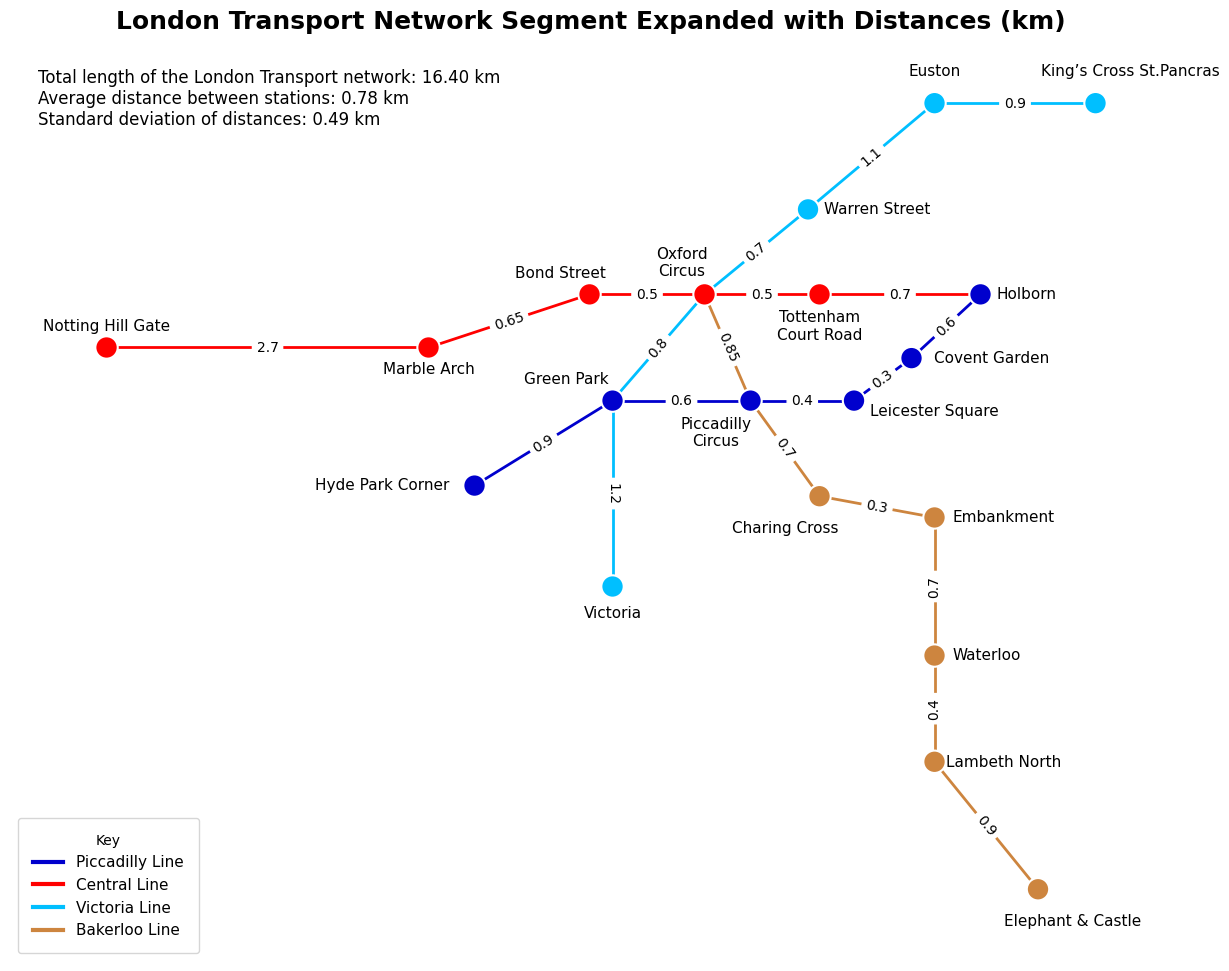

In [65]:
# Initialize graph
G = nx.Graph()

# Define distances between stations (in km)
distances = {
    ("Hyde Park Corner", "Green Park"): 0.9,
    ("Green Park", "Piccadilly Circus"): 0.6,
    ("Piccadilly Circus", "Leicester Square"): 0.4,
    ("Leicester Square", "Covent Garden"): 0.3,
    ("Covent Garden", "Holborn"): 0.6,
    ("Notting Hill Gate", "Marble Arch"): 2.7,
    ("Marble Arch", "Bond Street"): 0.65,
    ("Bond Street", "Oxford Circus"): 0.5,
    ("Oxford Circus", "Tottenham Court Road"): 0.5,
    ("Tottenham Court Road", "Holborn"): 0.7,
    ("Victoria", "Green Park"): 1.2,
    ("Green Park", "Oxford Circus"): 0.8,
    ("Oxford Circus", "Warren Street"): 0.7,
    ("Warren Street", "Euston"): 1.1,
    ("Euston", "King’s Cross St. Pancras"): 0.9,
    ("Elephant & Castle", "Lambeth North"): 0.9,
    ("Lambeth North", "Waterloo"): 0.4,
    ("Waterloo", "Embankment"): 0.7,
    ("Embankment", "Charing Cross"): 0.3,
    ("Charing Cross", "Piccadilly Circus"): 0.7,
    ("Piccadilly Circus", "Oxford Circus"): 0.85
}

# Add edges with distances as weights
for (station1, station2), distance in distances.items():
    G.add_edge(station1, station2, weight=distance)

# Define layout positions for stations
pos = {
    "Hyde Park Corner": (0, 0.2),
    "Green Park": (1.2, 1),
    "Piccadilly Circus": (2.4, 1),
    "Leicester Square": (3.3, 1),
    "Covent Garden": (3.8, 1.4),
    "Holborn": (4.4, 2),
    "Notting Hill Gate": (-3.2, 1.5),
    "Marble Arch": (-0.4, 1.5),
    "Bond Street": (1, 2),
    "Oxford Circus": (2, 2),
    "Tottenham Court Road": (3, 2),
    "Victoria": (1.2, -0.75),
    "Warren Street": (2.9, 2.8),
    "Euston": (4, 3.8),
    "King’s Cross St. Pancras": (5.4, 3.8),
    "Elephant & Castle": (4.9, -3.6),
    "Lambeth North": (4, -2.4),
    "Waterloo": (4, -1.4),
    "Embankment": (4, -0.1),
    "Charing Cross": (3, 0.1)
}

# Define line colors and edges
line_colors = {
    "Piccadilly Line": ("mediumblue", [
        ("Hyde Park Corner", "Green Park"), ("Green Park", "Piccadilly Circus"),
        ("Piccadilly Circus", "Leicester Square"), ("Leicester Square", "Covent Garden"),
        ("Covent Garden", "Holborn")
    ]),
    "Central Line": ("red", [
        ("Notting Hill Gate", "Marble Arch"), ("Marble Arch", "Bond Street"),
        ("Bond Street", "Oxford Circus"), ("Oxford Circus", "Tottenham Court Road"),
        ("Tottenham Court Road", "Holborn")
    ]),
    "Victoria Line": ("deepskyblue", [
        ("Victoria", "Green Park"), ("Green Park", "Oxford Circus"),
        ("Oxford Circus", "Warren Street"), ("Warren Street", "Euston"),
        ("Euston", "King’s Cross St. Pancras")
    ]),
    "Bakerloo Line": ("peru", [
        ("Elephant & Castle", "Lambeth North"), ("Lambeth North", "Waterloo"),
        ("Waterloo", "Embankment"), ("Embankment", "Charing Cross"),
        ("Charing Cross", "Piccadilly Circus"), ("Piccadilly Circus", "Oxford Circus")
    ])
}

# Automatically determine node colors
node_colors = {}
for line, (color, edges) in line_colors.items():
    for edge in edges:  # Each edge is a tuple (node1, node2)
        for node in edge:  # Each edge contains 2 nodes
            if node not in node_colors:  # If the node doesn't already have a color
                node_colors[node] = color  # Assign the color of the line

# Plot graph
plt.figure(figsize=(15, 12))
plt.title("London Transport Network Segment Expanded with Distances (km)", fontsize=18, fontweight="bold")

# Prepare the list of colors for the nodes using a loop
node_color_list = []
for node in G.nodes:
    node_color_list.append(node_colors[node])

# Draw nodes with colors based on the first occurrence in a line
nx.draw_networkx_nodes(G, pos, node_size=260, node_color=node_color_list, edgecolors="white", linewidths=1.5)

# Draw edges for each line
for line, (color, edges) in line_colors.items():
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=color, width=2)

# Define layout positions for stations
label_pos = {
    "Hyde Park Corner": (-0.8, 0.2),
    "Green Park": (0.8, 1.2),
    "Piccadilly\nCircus": (2.1, 0.7),
    "Leicester Square": (4, 0.9),
    "Covent Garden": (4.5, 1.4),
    "Holborn": (4.8, 2),
    
    "Notting Hill Gate": (-3.2, 1.7),
    "Marble Arch": (-0.4, 1.3),
    "Bond Street": (0.75, 2.2),
    "Oxford\nCircus": (1.8, 2.3),
    "Tottenham\nCourt Road": (3, 1.7),
    
    "Victoria": (1.2, -1),
    "Warren Street": (3.5, 2.8),
    "Euston": (4, 4.1),
    "King’s Cross St.Pancras": (5.7, 4.1),  
    
    "Elephant & Castle": (5.2, -3.9),
    "Lambeth North": (4.6, -2.4),
    "Waterloo": (4.45, -1.4),
    "Embankment": (4.6, -0.1),
    "Charing Cross": (2.7, -0.2)
}

# Add station labels
for station, (x, y) in label_pos.items():
    plt.text(x, y, station, fontsize=11, ha="center", va="center")

# Add edge labels for distances
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Custom legend using plt.scatter
plt.plot([], [], color="mediumblue", label="Piccadilly Line", linewidth=3)
plt.plot([], [], color="red", label="Central Line", linewidth=3)
plt.plot([], [], color="deepskyblue", label="Victoria Line", linewidth=3)
plt.plot([], [], color="peru", label="Bakerloo Line", linewidth=3)
plt.legend(title="Key", loc="lower left", fontsize=11, borderpad=1)

# Extract edge weights (distances) from the graph
edge_weights = [data['weight'] for _, _, data in G.edges(data=True)]

# Calculate total length of the transport network
total_length = sum(edge_weights)

# Calculate average distance between stations
average_distance = np.mean(edge_weights)

# Calculate standard deviation of the distances
std_deviation = np.std(edge_weights)

results_text = (
    f"Total length of the London Transport network: {total_length:.2f} km\n"
    f"Average distance between stations: {average_distance:.2f} km\n"
    f"Standard deviation of distances: {std_deviation:.2f} km"
)
#plt.text(-3, 3.6, results_text, fontsize=12, bbox=dict(boxstyle="round,pad=0.4", edgecolor="lightgrey",facecolor="white", alpha=0.8))
plt.text(-3.8, 3.6, results_text, fontsize=12)

plt.axis("off")
plt.show()


# Extended Task

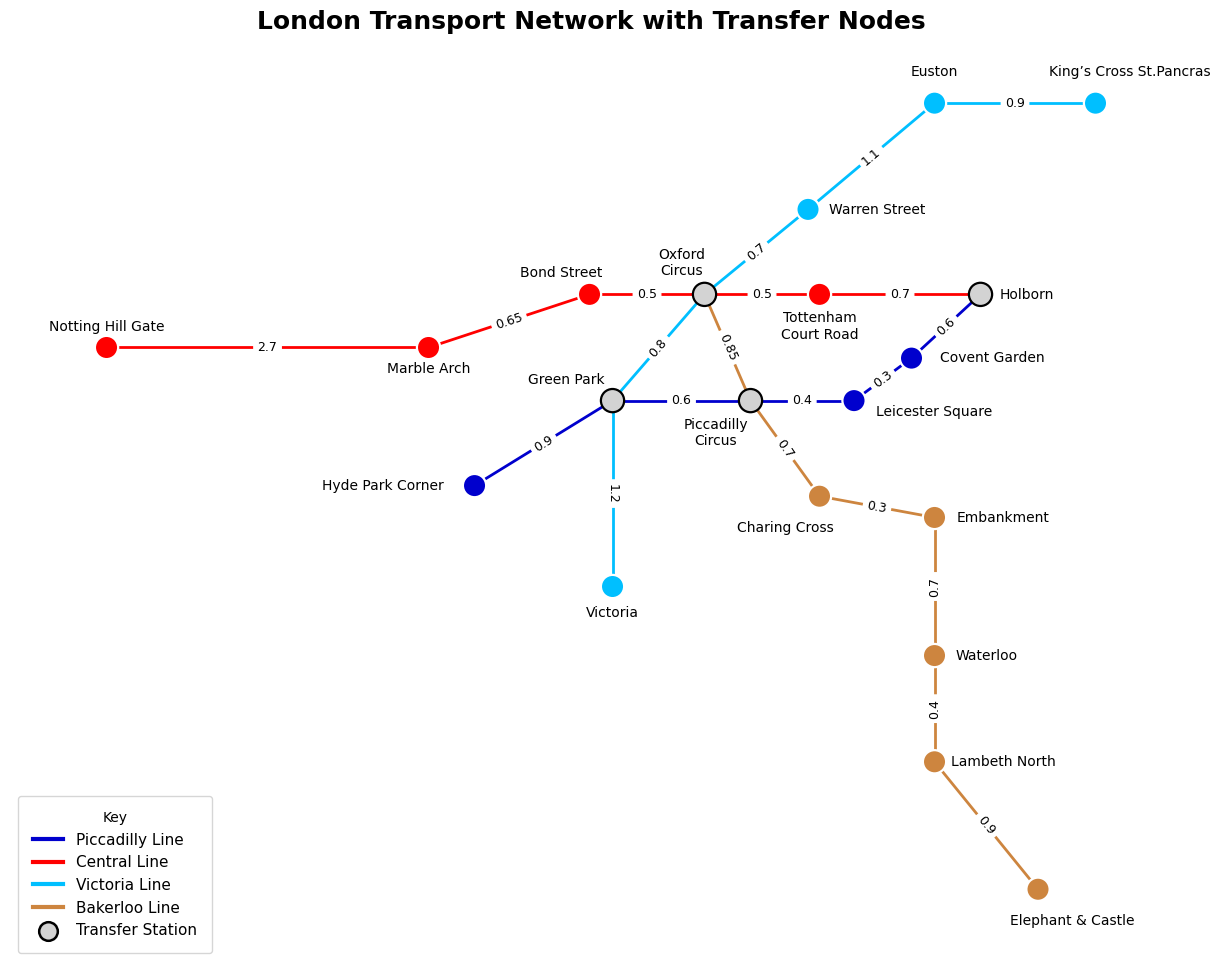

In [ ]:
# Initialize graph
G = nx.Graph()

# Define distances between stations (in km)
distances = {
    ("Hyde Park Corner", "Green Park"): 0.9,
    ("Green Park", "Piccadilly Circus"): 0.6,
    ("Piccadilly Circus", "Leicester Square"): 0.4,
    ("Leicester Square", "Covent Garden"): 0.3,
    ("Covent Garden", "Holborn"): 0.6,
    ("Notting Hill Gate", "Marble Arch"): 2.7,
    ("Marble Arch", "Bond Street"): 0.65,
    ("Bond Street", "Oxford Circus"): 0.5,
    ("Oxford Circus", "Tottenham Court Road"): 0.5,
    ("Tottenham Court Road", "Holborn"): 0.7,
    ("Victoria", "Green Park"): 1.2,
    ("Green Park", "Oxford Circus"): 0.8,
    ("Oxford Circus", "Warren Street"): 0.7,
    ("Warren Street", "Euston"): 1.1,
    ("Euston", "King’s Cross St. Pancras"): 0.9,
    ("Elephant & Castle", "Lambeth North"): 0.9,
    ("Lambeth North", "Waterloo"): 0.4,
    ("Waterloo", "Embankment"): 0.7,
    ("Embankment", "Charing Cross"): 0.3,
    ("Charing Cross", "Piccadilly Circus"): 0.7,
    ("Piccadilly Circus", "Oxford Circus"): 0.85
}

# Add edges with distances as weights
for (station1, station2), distance in distances.items():
    G.add_edge(station1, station2, weight=distance)

# Define layout positions for stations
pos = {
    "Hyde Park Corner": (0, 0.2),
    "Green Park": (1.2, 1),
    "Piccadilly Circus": (2.4, 1),
    "Leicester Square": (3.3, 1),
    "Covent Garden": (3.8, 1.4),
    "Holborn": (4.4, 2),
    "Notting Hill Gate": (-3.2, 1.5),
    "Marble Arch": (-0.4, 1.5),
    "Bond Street": (1, 2),
    "Oxford Circus": (2, 2),
    "Tottenham Court Road": (3, 2),
    "Victoria": (1.2, -0.75),
    "Warren Street": (2.9, 2.8),
    "Euston": (4, 3.8),
    "King’s Cross St. Pancras": (5.4, 3.8),
    "Elephant & Castle": (4.9, -3.6),
    "Lambeth North": (4, -2.4),
    "Waterloo": (4, -1.4),
    "Embankment": (4, -0.1),
    "Charing Cross": (3, 0.1)
}

# Define line colors and edges
line_colors = {
    "Piccadilly Line": ("mediumblue", [
        ("Hyde Park Corner", "Green Park"), ("Green Park", "Piccadilly Circus"),
        ("Piccadilly Circus", "Leicester Square"), ("Leicester Square", "Covent Garden"),
        ("Covent Garden", "Holborn")
    ]),
    "Central Line": ("red", [
        ("Notting Hill Gate", "Marble Arch"), ("Marble Arch", "Bond Street"),
        ("Bond Street", "Oxford Circus"), ("Oxford Circus", "Tottenham Court Road"),
        ("Tottenham Court Road", "Holborn")
    ]),
    "Victoria Line": ("deepskyblue", [
        ("Victoria", "Green Park"), ("Green Park", "Oxford Circus"),
        ("Oxford Circus", "Warren Street"), ("Warren Street", "Euston"),
        ("Euston", "King’s Cross St. Pancras")
    ]),
    "Bakerloo Line": ("peru", [
        ("Elephant & Castle", "Lambeth North"), ("Lambeth North", "Waterloo"),
        ("Waterloo", "Embankment"), ("Embankment", "Charing Cross"),
        ("Charing Cross", "Piccadilly Circus"), ("Piccadilly Circus", "Oxford Circus")
    ])
}

# Automatically determine node colors
node_colors = {}
for line, (color, edges) in line_colors.items():
    for edge in edges: 
        for node in edge:  
            if node not in node_colors:  
                node_colors[node] = color  

# Identify transfer nodes
transfer_nodes = set()
for node in G.nodes:
    lines_passing = set()
    for line, (_, edges) in line_colors.items():
        for edge in edges:
            if node in edge:
                lines_passing.add(line)
    if len(lines_passing) > 1:
        transfer_nodes.add(node)

# Create node color list
node_color_list = []
node_border_colors = []
for node in G.nodes:
    if node in transfer_nodes:
        node_color_list.append("lightgray")  # Highlight transfer nodes in gray
        node_border_colors.append("black") # Add white border to transfer nodes
    else:
        node_color_list.append(node_colors[node])
        node_border_colors.append("white")

# Plot graph
plt.figure(figsize=(15, 12))
plt.title("London Transport Network with Transfer Nodes", fontsize=18, fontweight="bold")

# Draw nodes
#nx.draw_networkx_nodes(G, pos, node_size=260, node_color=node_color_list)
# Draw nodes with border colors
nx.draw_networkx_nodes(G, pos, node_size=280, node_color=node_color_list, edgecolors=node_border_colors, linewidths=1.6)

# Draw edges for each line
for line, (color, edges) in line_colors.items():
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=color, width=2)

# Define layout positions for stations
label_pos = {
    "Hyde Park Corner": (-0.8, 0.2),
    "Green Park": (0.8, 1.2),
    "Piccadilly\nCircus": (2.1, 0.7),
    "Leicester Square": (4, 0.9),
    "Covent Garden": (4.5, 1.4),
    "Holborn": (4.8, 2),
    
    "Notting Hill Gate": (-3.2, 1.7),
    "Marble Arch": (-0.4, 1.3),
    "Bond Street": (0.75, 2.2),
    "Oxford\nCircus": (1.8, 2.3),
    "Tottenham\nCourt Road": (3, 1.7),
    
    "Victoria": (1.2, -1),
    "Warren Street": (3.5, 2.8),
    "Euston": (4, 4.1),
    "King’s Cross St.Pancras": (5.7, 4.1),  
    
    "Elephant & Castle": (5.2, -3.9),
    "Lambeth North": (4.6, -2.4),
    "Waterloo": (4.45, -1.4),
    "Embankment": (4.6, -0.1),
    "Charing Cross": (2.7, -0.2)
}

# Add station labels
for station, (x, y) in label_pos.items():
    plt.text(x, y, station, fontsize=10, ha="center", va="center")

# Add edge labels for distances
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

# Add custom legend
for line, (color, _) in line_colors.items():
    plt.plot([], [], color=color, label=line, linewidth=3)
plt.scatter([], [], c="lightgray", edgecolor="black", s=180, label="Transfer Station", linewidth=1.8)
plt.legend(title="Key", loc="lower left", fontsize=11, borderpad=1)

plt.axis("off")
plt.show()